# COVID-19 Sweden

Data from Folkhälsomyndigheten in

https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/bekraftade-fall-i-sverige/

(xlsx files in `./<datasets_path>/<YYYY-MM-DD>/` for the following to work)

Sections:
* **Sweden**
 * [Confirmed number of COVID-19 cases](#swe_conf_cases)
 * [Confirmed number of deceased for COVID-19](#swe_num_deceased)
 * [Confirmed number of COVID-19 cases in intensive care units (ICU)](#swe_num_icu)
* **Stockholm**
 * [Confirmed number of COVID-19 cases](#stock_conf_cases)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()

target_date = '2020-04-26'

In [2]:
def get_dfs_from_xlsx(ref_date, xlsx_sheet_name):
    temp_dt_prev1 = datetime.datetime.strptime(ref_date, '%Y-%m-%d') - datetime.timedelta(days=1)
    ref_date_prev1 = temp_dt_prev1.strftime('%Y-%m-%d')
    temp_dt_prev2 = datetime.datetime.strptime(ref_date, '%Y-%m-%d') - datetime.timedelta(days=2)
    ref_date_prev2 = temp_dt_prev2.strftime('%Y-%m-%d')
    
    datasets_path = './datasets/'

    # Data from Folkhälsomyndigheten in './<datasets_path>/<YYYY-MM-DD>/Folkhalsomyndigheten_Covid19.xlsx'
    xlsx_file_name = datasets_path + ref_date + '/Folkhalsomyndigheten_Covid19.xlsx'
    xlsx_file_name_prev1 = datasets_path + ref_date_prev1 + '/Folkhalsomyndigheten_Covid19.xlsx'
    xlsx_file_name_prev2 = datasets_path + ref_date_prev2 + '/Folkhalsomyndigheten_Covid19.xlsx'

    xl = pd.ExcelFile(xlsx_file_name)
    df = xl.parse(xlsx_sheet_name, index_col = 0)
    xl_prev1 = pd.ExcelFile(xlsx_file_name_prev1)
    df_prev1 = xl_prev1.parse(xlsx_sheet_name, index_col = 0)
    xl_prev2 = pd.ExcelFile(xlsx_file_name_prev2)
    df_prev2 = xl_prev2.parse(xlsx_sheet_name, index_col = 0)
    
    return (df, df_prev1, df_prev2)

In [3]:
def prune_dataframe(dfr, name):
    if name == 'Antal per dag region':
        # Remove points until 2nd of March
        dfr = dfr[27:]
    elif name == 'Antal avlidna per dag':
        index_str = str(dfr.index[-1])
        if(index_str.lower() == 'uppgift saknas'):
          dfr = dfr[:-1] # remove last 'uppgift saknas' point
          dfr.index = pd.to_datetime(dfr.index)
    return dfr

In [4]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        splt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-2, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [5]:
# sheet name (Antal per dag region = Number of cases per day region)
(df, df_prev1, df_prev2) = get_dfs_from_xlsx(target_date, "Antal per dag region")

# Check on the last data point index
if(df.index[-1].strftime('%Y-%m-%d') == target_date):
    print('Last data point refers correctly to', target_date)
else:
    print('ERROR! Last data point refers to', df.index[-1].strftime('%Y-%m-%d'),
          'and different from target_date =', target_date)
    assert 'Correct date for last data point' == False

cumulative_cases = np.sum(df['Totalt_antal_fall'])
cumulative_cases_stockholm = np.sum(df['Stockholm'])
print('Total number of COVID-19 cases confirmed on ' + str(target_date) + ': ' +
      str(cumulative_cases) + ' (Stockholm: ' + str(cumulative_cases_stockholm) + ')')

# Get cumulative number of cases
df_cum = np.cumsum(df['Totalt_antal_fall'])

[df, df_cum, df_prev1, df_prev2] = list(map(lambda x: prune_dataframe(x, 'Antal per dag region'),
                                    [df, df_cum, df_prev1, df_prev2]))

# Remove last data point (partial measures)
df = df[:-1]
df_cum = df_cum[:-1]

# Utility variables
cases_last_date =  df.index[-1].strftime('%Y-%m-%d')
x_axis_range = np.arange(len(df))
plot_label = list(map(lambda x: x.strftime('%Y-%m-%d'), df.index))

Last data point refers correctly to 2020-04-26
Total number of COVID-19 cases confirmed on 2020-04-26: 18640 (Stockholm: 7290)


## Sweden - Confirmed number of COVID-19 cases<a id='swe_conf_cases'></a>

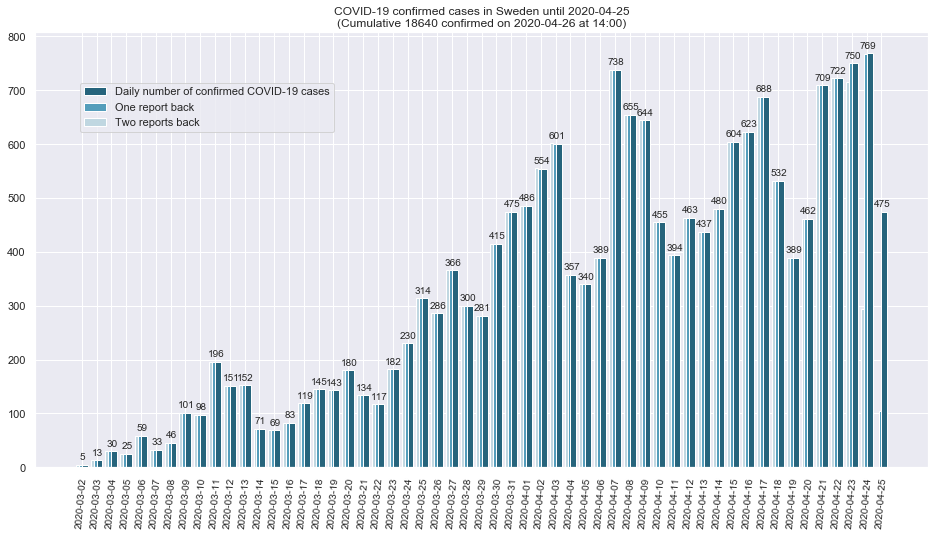

In [6]:
# Sweden
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

width = 0.2
rects1 = splt.bar(x_axis_range + width, df['Totalt_antal_fall'], 2*width,
                  color = '#26647C', label = f"Daily number of confirmed COVID-19 cases")
rects2 = splt.bar(np.arange(len(df_prev1)) - width/2, df_prev1['Totalt_antal_fall'], width,
                  color = '#549DBB', label = f"One report back")
rects3 = splt.bar(np.arange(len(df_prev2)) - 3*(width/2), df_prev2['Totalt_antal_fall'], width,
                  color = '#C0D7E1', label = f"Two reports back")

autolabel(rects1)

plt.xticks(ticks = x_axis_range, labels = plot_label, rotation = 85, size = 10)
plt.title(f"COVID-19 confirmed cases in Sweden until {cases_last_date}\n(Cumulative {cumulative_cases} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc = (0.05, 0.77))

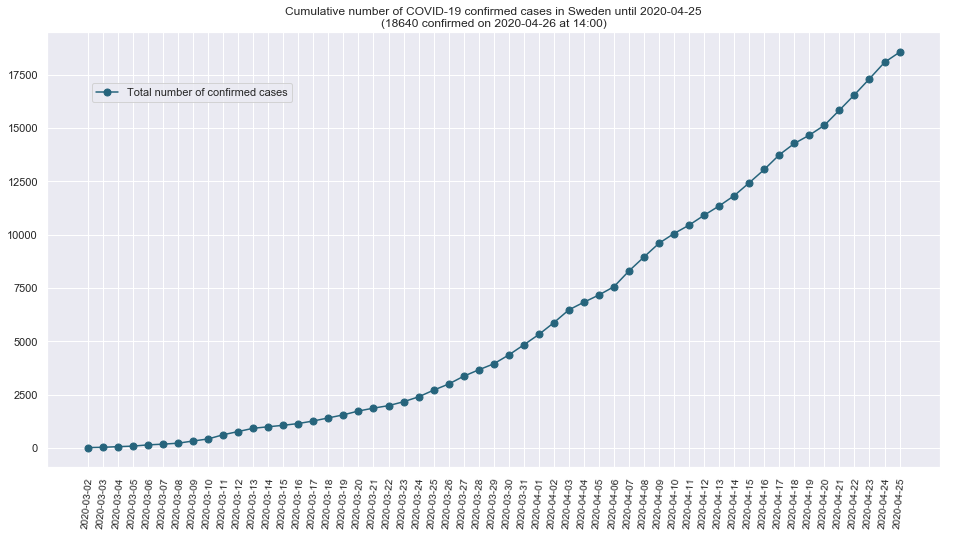

In [7]:
# Linear scale
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_axis_range, df_cum, '-o',
          markersize = 7, color = '#26647C',
          label = f"Total number of confirmed cases")

plt.xticks(ticks=x_axis_range, labels=plot_label, rotation=85, size = 10)
plt.title(f"Cumulative number of COVID-19 confirmed cases in Sweden until {cases_last_date}\n({cumulative_cases} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc=(0.05, 0.84))

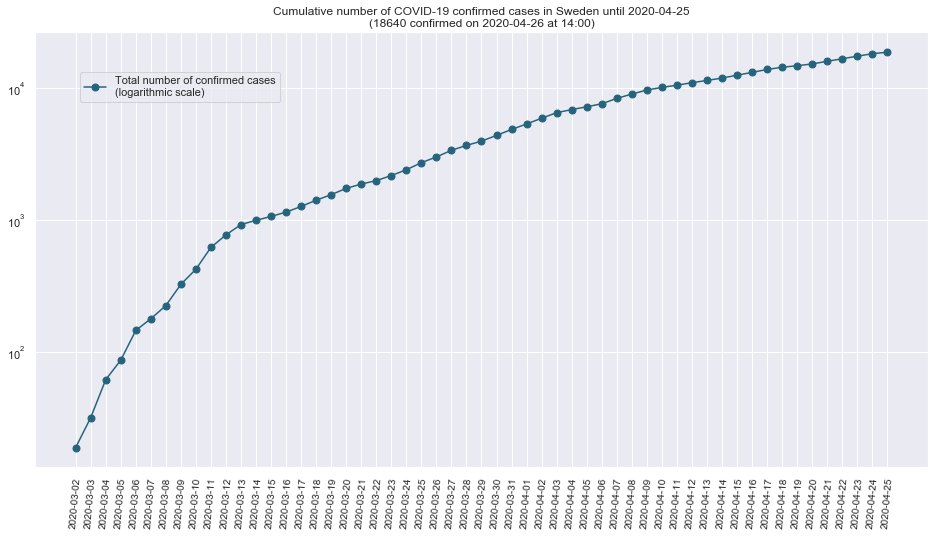

In [8]:
# Log scale
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_axis_range, df_cum, '-o',
          markersize = 7, color = '#26647C',
          label = f"Total number of confirmed cases\n(logarithmic scale)")

splt.set(yscale="log")
plt.xticks(ticks=x_axis_range, labels=plot_label, rotation=85, size = 10)
plt.title(f"Cumulative number of COVID-19 confirmed cases in Sweden until {cases_last_date}\n({cumulative_cases} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc=(0.05, 0.84))

## Sweden - Confirmed number of deceased for COVID-19<a id='swe_num_deceased'></a>

In [9]:
# sheet name (Antal avlidna per dag = Number of deceased per day)
(df_d, df_d_prev1, df_d_prev2) = get_dfs_from_xlsx(target_date, "Antal avlidna per dag")

# Get cumulative number of deceased
df_d_cum = np.cumsum(df_d['Antal_avlidna'])
cumulative_deceased = np.sum(df_d['Antal_avlidna'])

[df_d, df_d_cum, df_d_prev1, df_d_prev2] = list(map(lambda x: prune_dataframe(x, 'Antal avlidna per dag'),
                                                    [df_d, df_d_cum, df_d_prev1, df_d_prev2]))

print('Total number of deceased confirmed on ' + str(target_date) + ': ' + str(cumulative_deceased))

# Remove last data point (partial measures)
df_d = df_d[:-1]
df_d_cum = df_d_cum[:-1]

Total number of deceased confirmed on 2020-04-26: 2194


In [10]:
# Update utility variables
x_axis_range = np.arange(len(df_d))
# Check dates
if(df_d.index[-1].strftime('%Y-%m-%d') != cases_last_date):
    print('Warning! Dataset for deceased has a different date for last point')

plot_label = list(map(lambda x: x.strftime('%Y-%m-%d'), df_d.index))
cases_last_date = plot_label[-1]

Warning! Dataset for deceased has a different date for last point


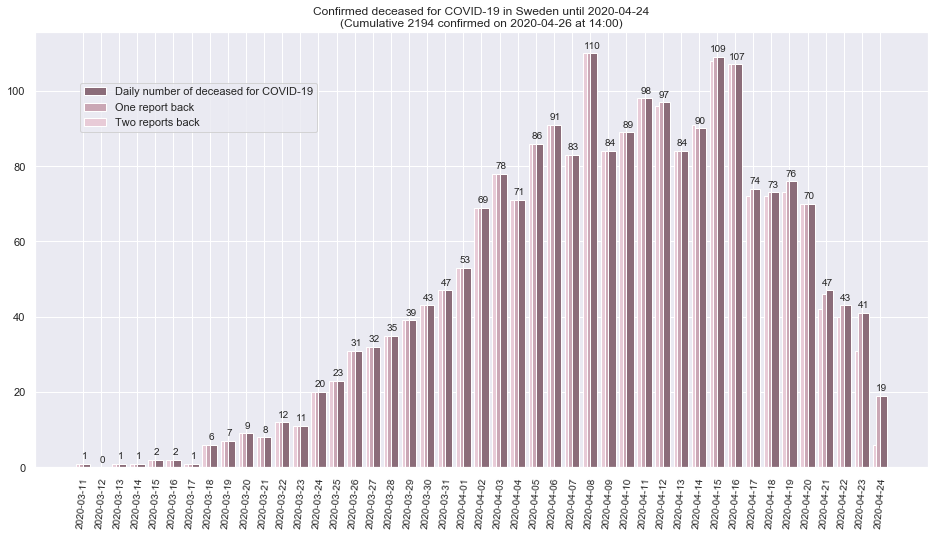

In [11]:
# Daily deceased
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

width = 0.2
rects1 = splt.bar(x_axis_range + width, df_d['Antal_avlidna'], 2*width,
                  color = '#8B6C79', label = f"Daily number of deceased for COVID-19")
rects2 = splt.bar(np.arange(len(df_d_prev1)) - width/2, df_d_prev1['Antal_avlidna'], width,
                  color = '#CAA7B5', label = f"One report back")
rects3 = splt.bar(np.arange(len(df_d_prev2)) - 3*(width/2), df_d_prev2['Antal_avlidna'], width,
                  color = '#E8CBD7', label = f"Two reports back")
autolabel(rects1)

plt.xticks(ticks = x_axis_range, labels = plot_label, rotation = 85, size = 10)
plt.title(f"Confirmed deceased for COVID-19 in Sweden until {cases_last_date}\n(Cumulative {cumulative_deceased} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc = (0.05, 0.77))

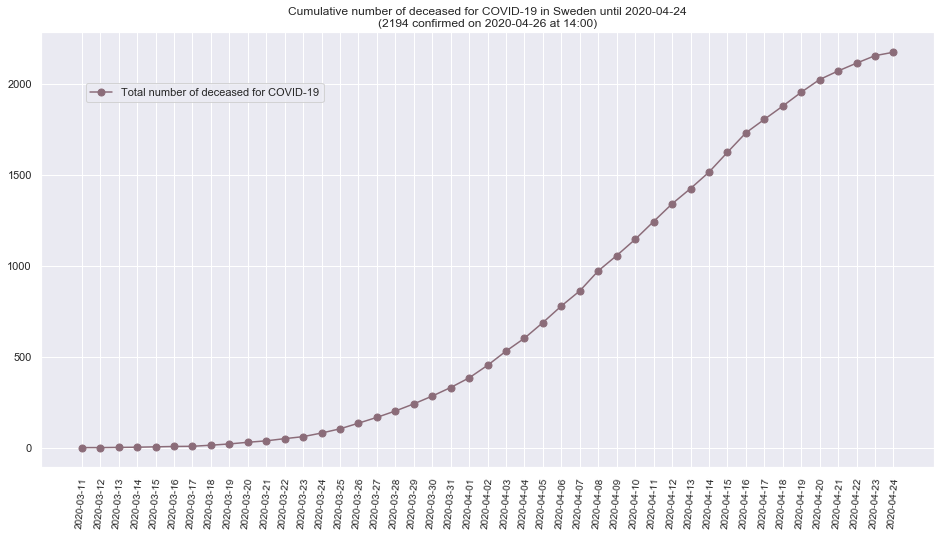

In [12]:
# Linear scale
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_axis_range, df_d_cum, '-o',
          markersize = 7, color = '#8B6C79',
          label = f"Total number of deceased for COVID-19")

plt.xticks(ticks=x_axis_range, labels=plot_label, rotation=85, size = 10)
plt.title(f"Cumulative number of deceased for COVID-19 in Sweden until {cases_last_date}\n({cumulative_deceased} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc=(0.05, 0.84))

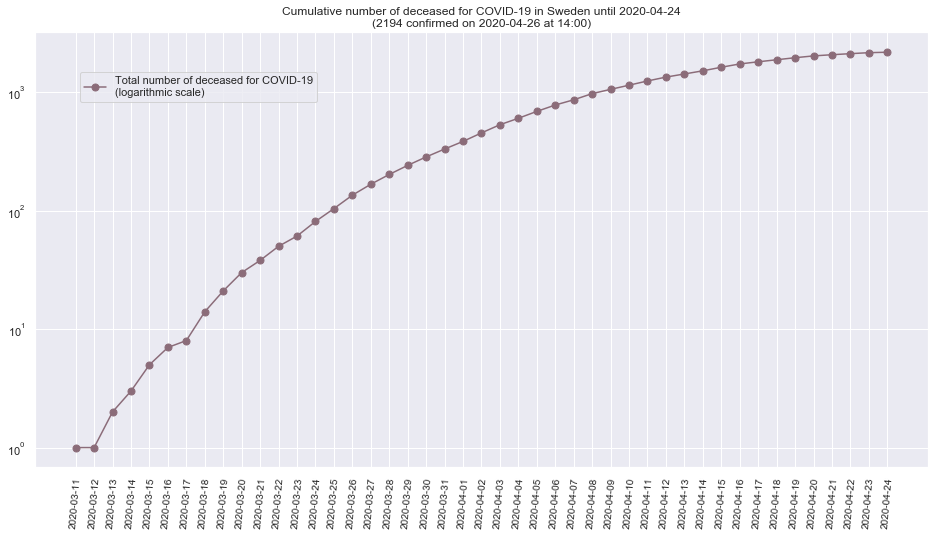

In [13]:
# Log scale
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_axis_range, df_d_cum, '-o',
          markersize = 7, color = '#8B6C79',
          label = f"Total number of deceased for COVID-19\n(logarithmic scale)")

splt.set(yscale="log")
plt.xticks(ticks=x_axis_range, labels=plot_label, rotation=85, size = 10)
plt.title(f"Cumulative number of deceased for COVID-19 in Sweden until {cases_last_date}\n({cumulative_deceased} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc=(0.05, 0.84))

## Sweden - Confirmed number of COVID-19 cases in intensive care units (ICU)<a id='swe_num_icu'></a>

Warning! Dataset for ICUs has a different date for last point


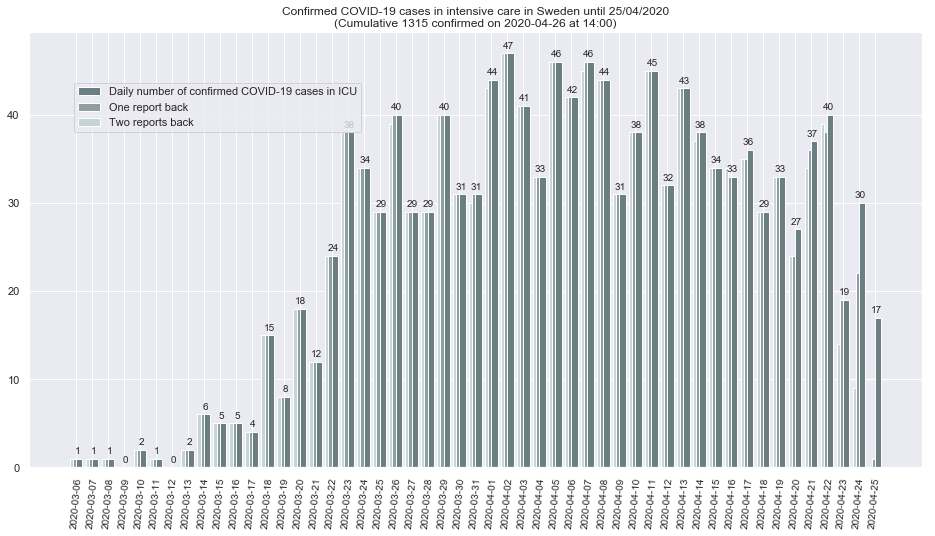

In [14]:
# sheet name (Antal intensivvårdade per dag = Number of intesive care cases per day)
(df_icu, df_icu_prev1, df_icu_prev2) = get_dfs_from_xlsx(target_date, 'Antal intensivvårdade per dag')

# Get cumulative number of cases in ICU
df_icu_cum = np.cumsum(df_icu['Antal_intensivvårdade'])
cumulative_icu = np.sum(df_icu['Antal_intensivvårdade'])

# Remove last data point (partial measures)
df_icu = df_icu[:-1]
df_icu_cum = df_icu_cum[:-1]

# Update utility variables
x_axis_range = np.arange(len(df_icu))
# Check dates
if(df_icu.index[-1].strftime('%d/%m/%Y') != cases_last_date):
    print('Warning! Dataset for ICUs has a different date for last point')
cases_last_date =  df_icu.index[-1].strftime('%d/%m/%Y')
plot_label = list(map(lambda x: x.strftime('%Y-%m-%d'), df_icu.index))

# Daily number of cases in ICU
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

width = 0.2
rects1 = splt.bar(x_axis_range + width, df_icu['Antal_intensivvårdade'], 2*width,
                  color = '#6A7E83', label = f"Daily number of confirmed COVID-19 cases in ICU")
rects2 = splt.bar(np.arange(len(df_icu_prev1)) - width/2, df_icu_prev1['Antal_intensivvårdade'], width,
                  color = '#8F9EA2', label = f"One report back")
rects3 = splt.bar(np.arange(len(df_icu_prev2)) - 3*(width/2), df_icu_prev2['Antal_intensivvårdade'], width,
                  color = '#C5D4D9', label = f"Two reports back")
autolabel(rects1)

plt.xticks(ticks = x_axis_range, labels = plot_label, rotation = 85, size = 10)
plt.title(f"Confirmed COVID-19 cases in intensive care in Sweden until {cases_last_date}\n(Cumulative {cumulative_icu} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc = (0.05, 0.77))

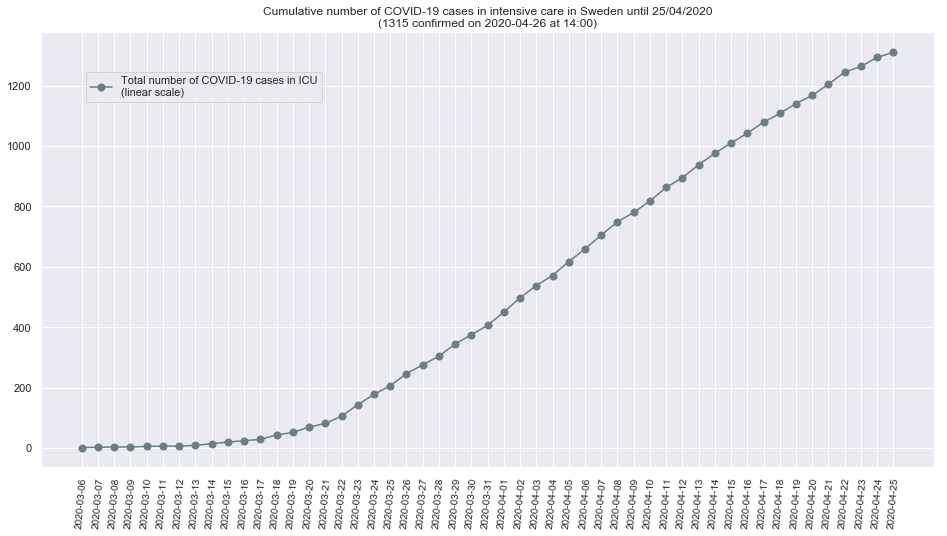

In [15]:
# Linear scale
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_axis_range, df_icu_cum, '-o',
           markersize = 7, c = '#6A7E83',
           label = f"Total number of COVID-19 cases in ICU\n(linear scale)")

plt.xticks(ticks=x_axis_range, labels=plot_label, rotation=85, size = 10)
plt.title(f"Cumulative number of COVID-19 cases in intensive care in Sweden until {cases_last_date}\n({cumulative_icu} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc=(0.05, 0.84))

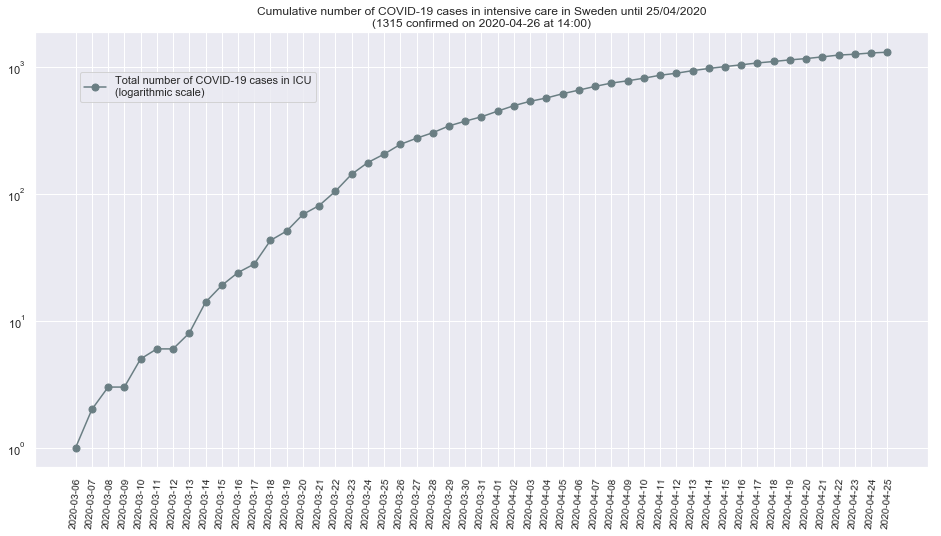

In [16]:
# Log scale
fig = plt.figure(figsize=(16, 8))

splt = fig.add_subplot(111)
splt.plot(x_axis_range, df_icu_cum, '-o',
           markersize = 7, c = '#6A7E83',
           label = f"Total number of COVID-19 cases in ICU\n(logarithmic scale)")

splt.set(yscale="log")
plt.xticks(ticks=x_axis_range, labels=plot_label, rotation=85, size = 10)
plt.title(f"Cumulative number of COVID-19 cases in intensive care in Sweden until {cases_last_date}\n({cumulative_icu} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc=(0.05, 0.84))

## Stockholm  - confirmed number of cases<a id='stock_conf_cases_temp'></a>

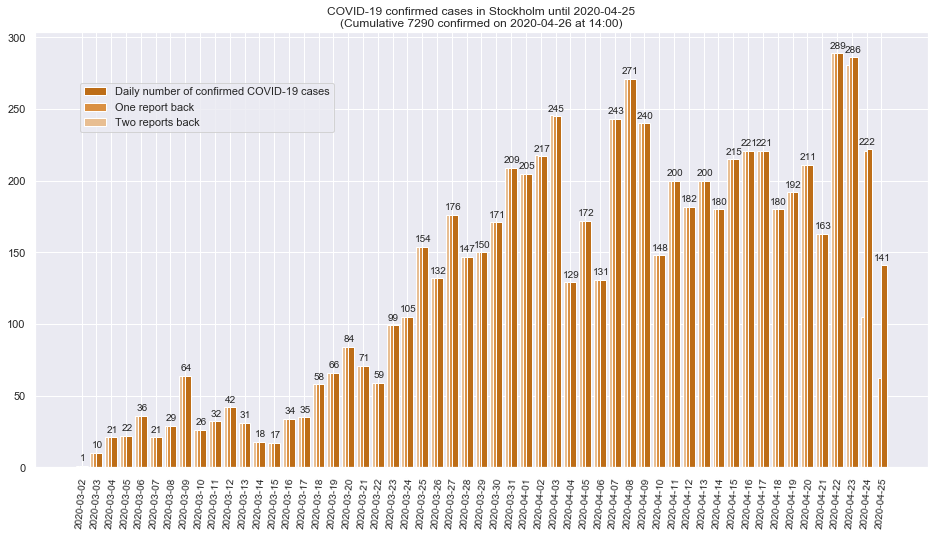

In [17]:
# Utility variables
cases_last_date =  df.index[-1].strftime('%Y-%m-%d')
x_axis_range = np.arange(len(df))
plot_label = list(map(lambda x: x.strftime('%Y-%m-%d'), df.index))

# Stockholm
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

width = 0.2
rects1 = splt.bar(x_axis_range + width, df['Stockholm'], 2*width,
                  color = '#BD6D17', label = f"Daily number of confirmed COVID-19 cases")
rects2 = splt.bar(np.arange(len(df_prev1)) - width/2, df_prev1['Stockholm'], width,
                  color = '#DA9043', label = f"One report back")
rects3 = splt.bar(np.arange(len(df_prev2)) - 3*(width/2), df_prev2['Stockholm'], width,
                  color = '#E8BE92', label = f"Two reports back")

autolabel(rects1)

plt.xticks(ticks = x_axis_range, labels = plot_label, rotation = 85, size = 10)
plt.title(f"COVID-19 confirmed cases in Stockholm until {cases_last_date}\n(Cumulative {cumulative_cases_stockholm} confirmed on {target_date} at 14:00)", size=12)
plt.legend(loc = (0.05, 0.77))